In [2]:
import pandas as pd

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Check first 5 rows
print(df.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [8]:
#ure, platelets, serum_creatinine, serum_sodium, sex, smoking, time,
#DEATH_EVENT

In [9]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


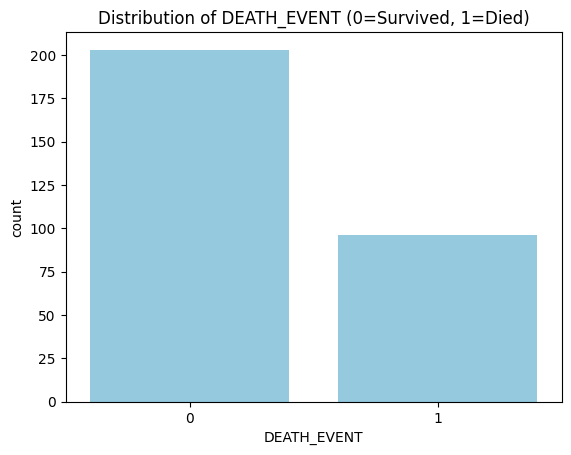

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='DEATH_EVENT', data=df, color='skyblue')  # Use color instead of palette
plt.title('Distribution of DEATH_EVENT (0=Survived, 1=Died)')
plt.show()


#show the Death_person list


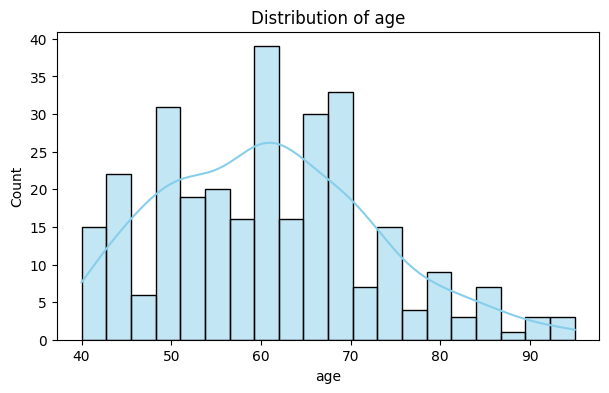

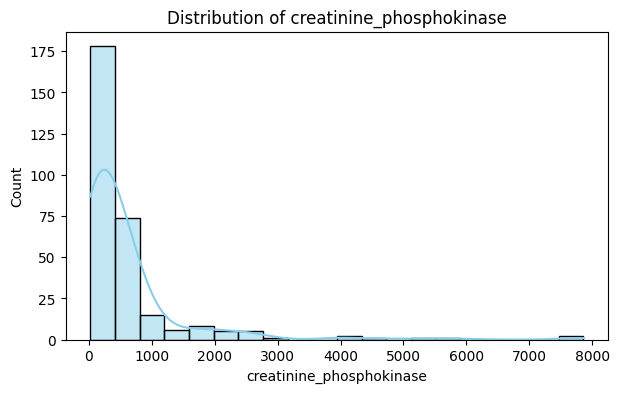

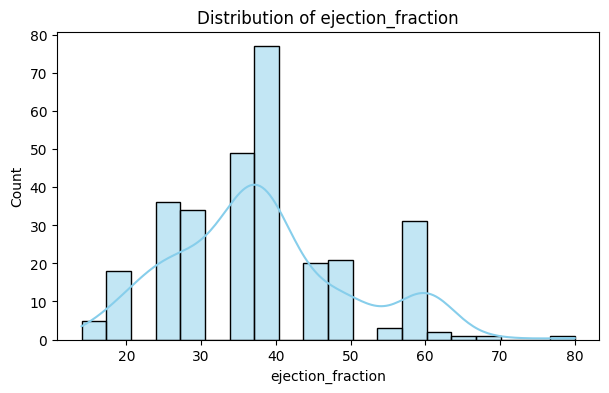

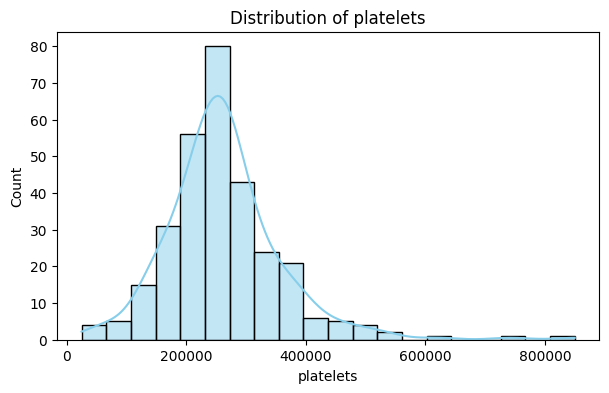

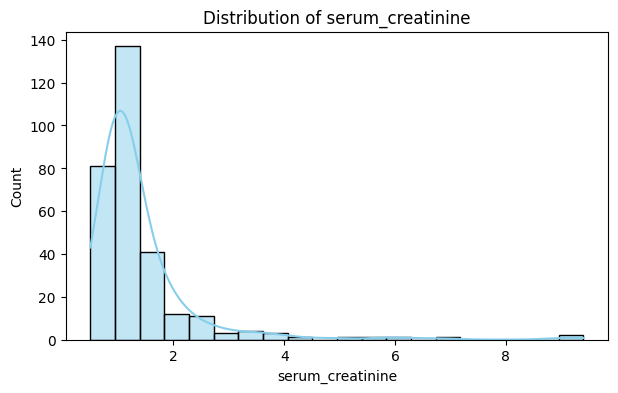

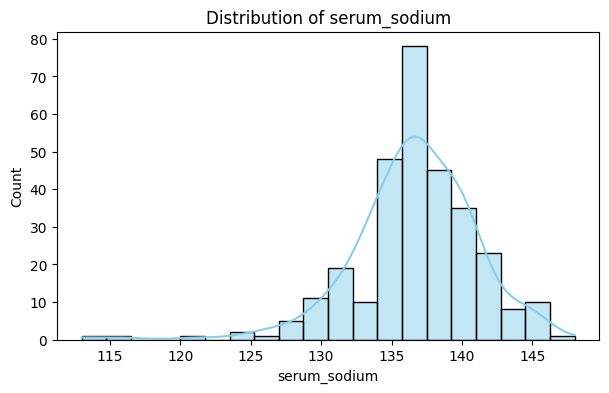

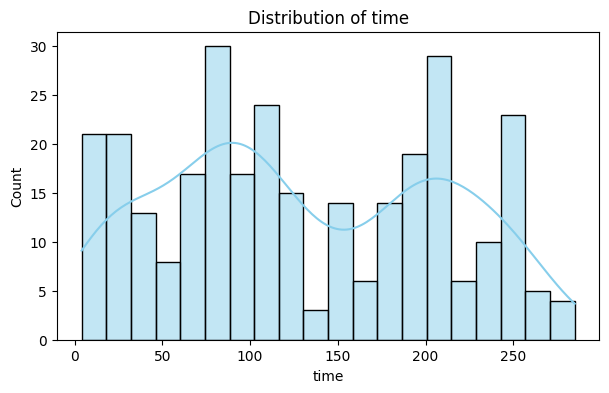

In [13]:
#Insight Example:

#“Most patients are aged 50-70.”

#Ejection fraction ranges from 20 to 70, with low values increasing risk of death.”


num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



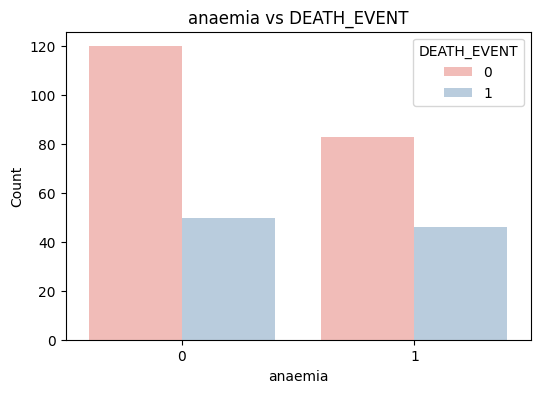

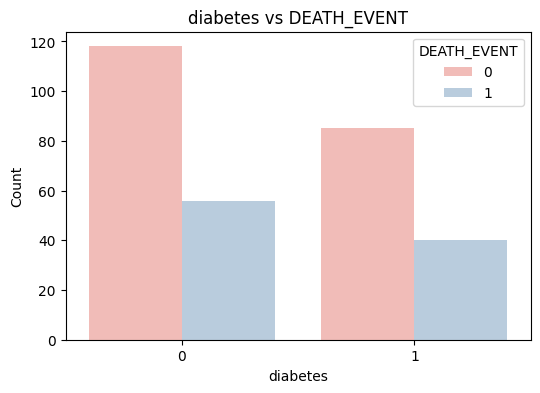

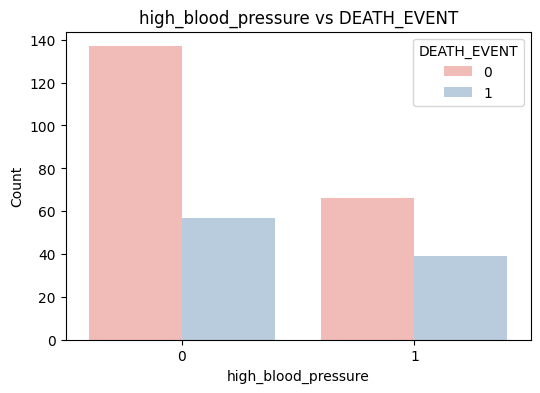

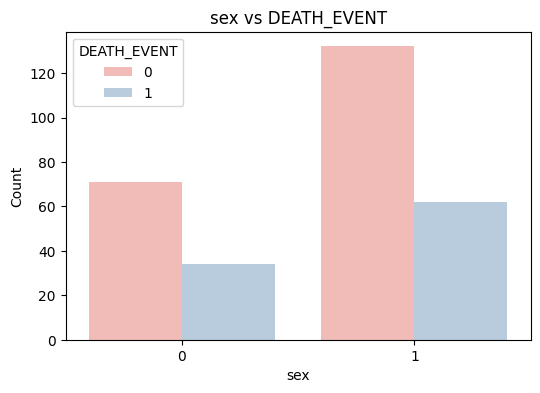

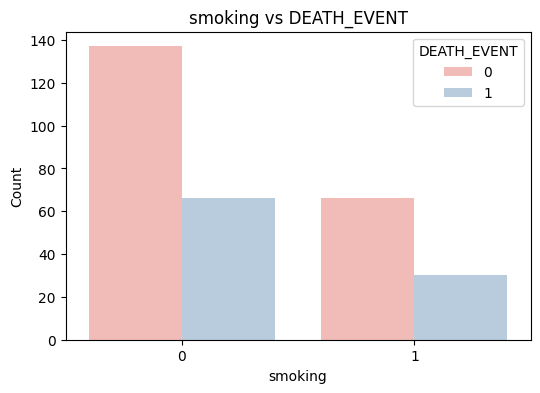

In [14]:
#Patients with anaemia have a higher death rate.”

#“High blood pressure seems slightly correlated with mortality.”


cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='DEATH_EVENT', data=df, palette='Pastel1')
    plt.title(f'{col} vs DEATH_EVENT')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()








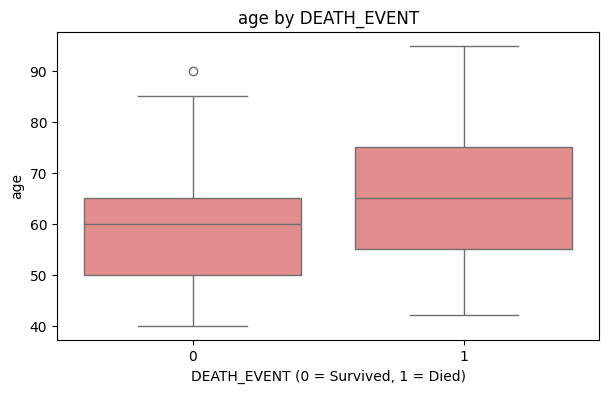

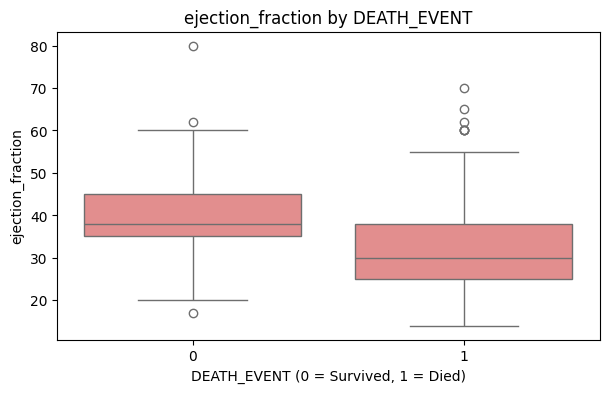

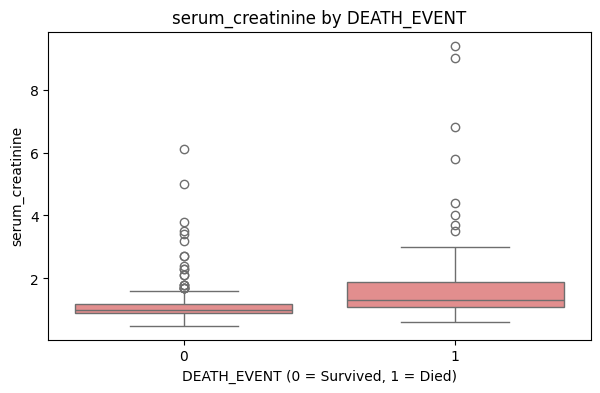

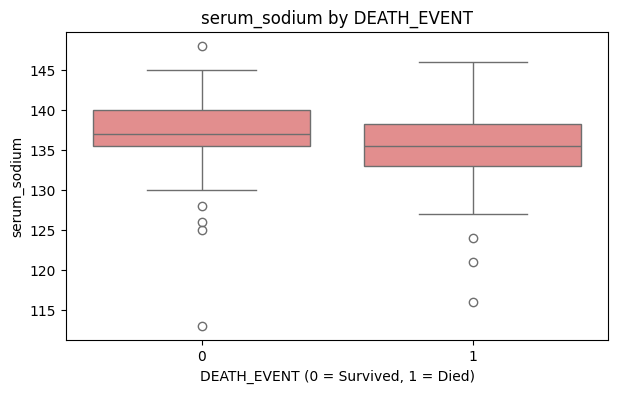

In [16]:
#“Patients who died had lower ejection fractions and abnormal serum creatinine levels.”

import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to compare
cols = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

# Loop through columns and plot boxplots
for col in cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='DEATH_EVENT', y=col, data=df, color='lightcoral')  # Use color instead of palette
    plt.title(f'{col} by DEATH_EVENT')
    plt.xlabel('DEATH_EVENT (0 = Survived, 1 = Died)')
    plt.ylabel(col)
    plt.show()





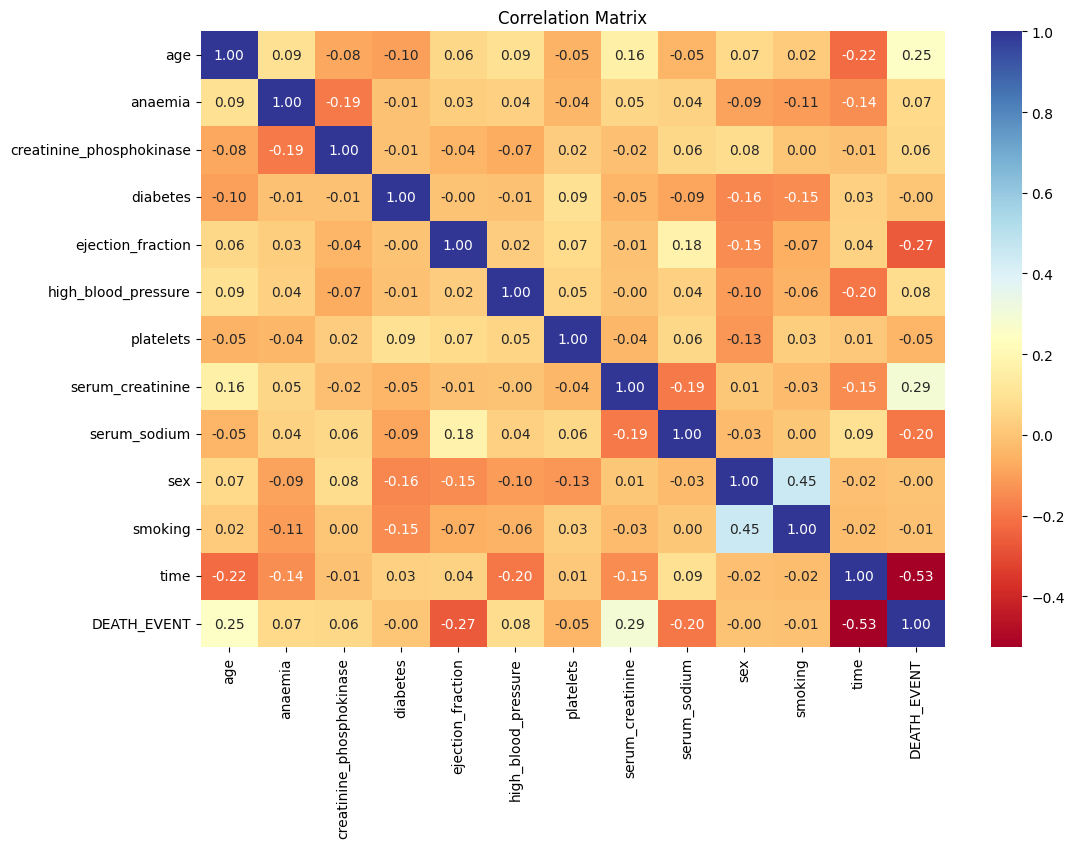

In [17]:
#“Ejection fraction and serum sodium have moderate correlation with death.”

#“Creatinine phosphokinase does not strongly affect mortality.”

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()







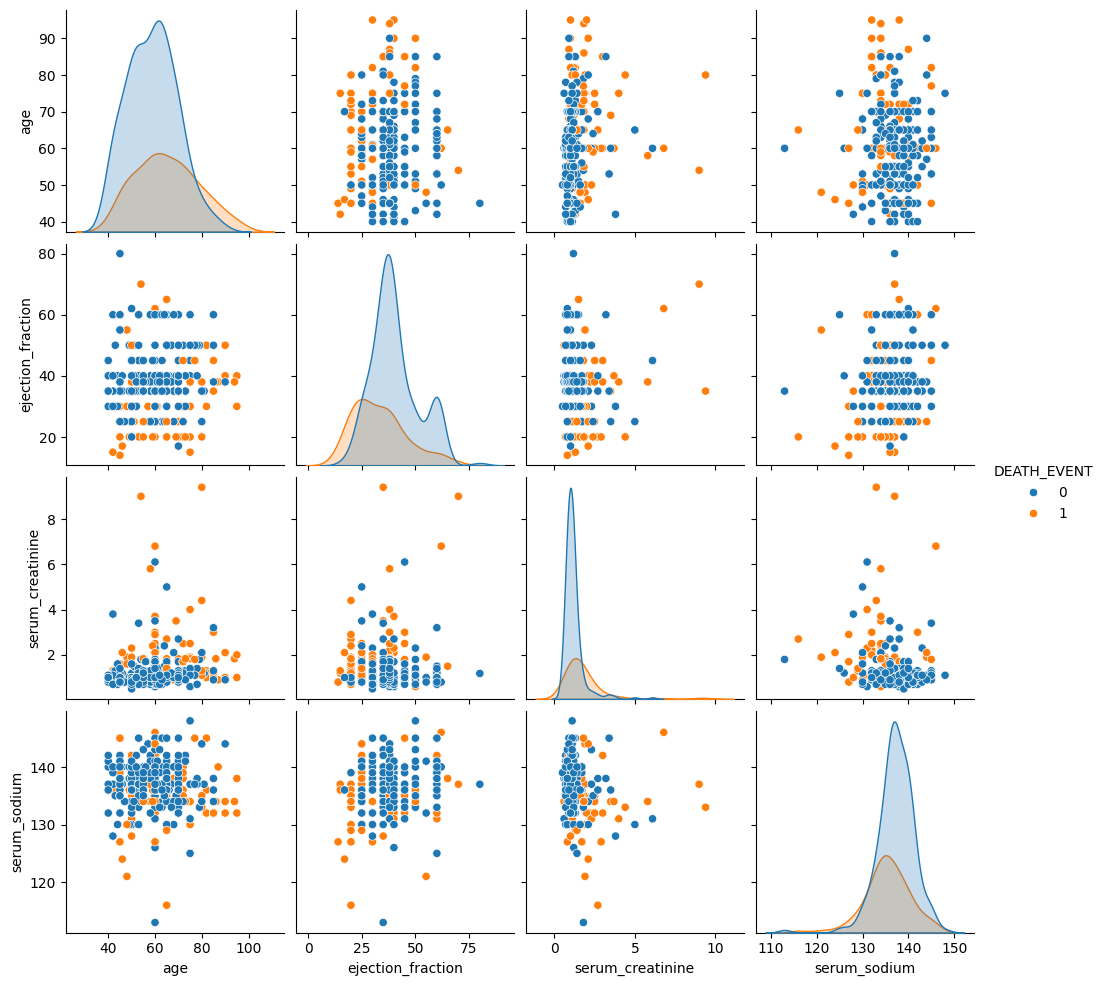

In [18]:
#“Lower ejection fraction and
#higher creatinine are more common in patients who died.”
sns.pairplot(df, hue='DEATH_EVENT', vars=['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium'])
plt.show()




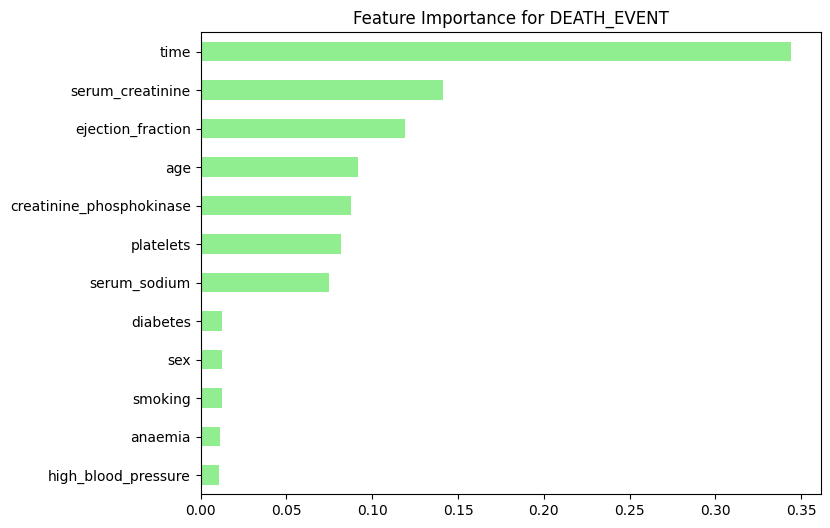

In [19]:
#“Ejection fraction, serum creatinine, age, and 
#platelets are most important in predicting death.”


from sklearn.ensemble import RandomForestClassifier

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6), color='lightgreen')
plt.title("Feature Importance for DEATH_EVENT")
plt.show()


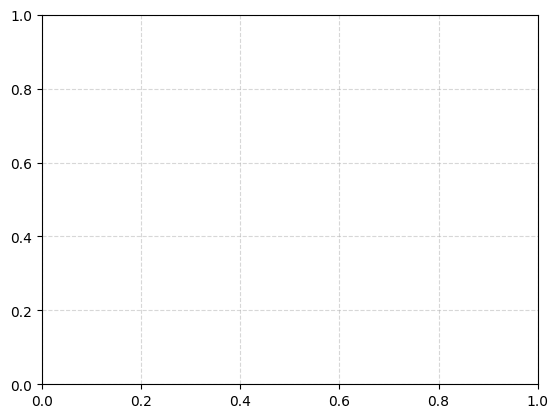

In [20]:
plt.grid(True, linestyle='--', alpha=0.5)


ModuleNotFoundError: No module named 'xlsxwriter'